import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

store_sales = pd.read_csv("C:/Users/_USER_/Downloads/sql df.csv")
store_sales.head()




In [98]:
print(store_sales.info())
print(store_sales.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2781 entries, 0 to 2780
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_date         2781 non-null   datetime64[ns]
 1   ga_session_id      2781 non-null   int64         
 2   continent          2781 non-null   object        
 3   country            2781 non-null   object        
 4   device             2781 non-null   object        
 5   browser            2781 non-null   object        
 6   device_model       2781 non-null   object        
 7   operating_system   2781 non-null   object        
 8   browser_language   2781 non-null   object        
 9   traffic_source     2781 non-null   object        
 10  channel            2781 non-null   object        
 11  account_id         2781 non-null   int64         
 12  is_verified        2781 non-null   int64         
 13  is_unsubscribed    2781 non-null   int64         
 14  product_

In [99]:
#перевірка на пусті значення
print(f"перевірка на пусті значення :{store_sales.isna().sum()}")
# у відсотках
print(store_sales.isna().sum() / store_sales.shape[0] * 100)

перевірка на пусті значення :order_date           0
ga_session_id        0
continent            0
country              0
device               0
browser              0
device_model         0
operating_system     0
browser_language     0
traffic_source       0
channel              0
account_id           0
is_verified          0
is_unsubscribed      0
product_category     0
product_name         0
price                0
short_description    0
duplicate_rows       0
Day of Week          0
Month                0
dtype: int64
order_date           0.0
ga_session_id        0.0
continent            0.0
country              0.0
device               0.0
browser              0.0
device_model         0.0
operating_system     0.0
browser_language     0.0
traffic_source       0.0
channel              0.0
account_id           0.0
is_verified          0.0
is_unsubscribed      0.0
product_category     0.0
product_name         0.0
price                0.0
short_description    0.0
duplicate_rows       0.0


In [100]:
#Заповнення пропущених значень
store_sales['browser_language'] = store_sales['browser_language'].fillna('Unknown')
print(f"Заповненні значення :{store_sales.isna().sum()}")

Заповненні значення :order_date           0
ga_session_id        0
continent            0
country              0
device               0
browser              0
device_model         0
operating_system     0
browser_language     0
traffic_source       0
channel              0
account_id           0
is_verified          0
is_unsubscribed      0
product_category     0
product_name         0
price                0
short_description    0
duplicate_rows       0
Day of Week          0
Month                0
dtype: int64


In [101]:
#перевірка на дублікати
store_sales['duplicate_rows'] = store_sales.duplicated()
print(store_sales['duplicate_rows'])
print(store_sales['duplicate_rows'].sum())


0       False
1       False
2       False
3       False
4       False
        ...  
2776    False
2777    False
2778    False
2779    False
2780    False
Name: duplicate_rows, Length: 2781, dtype: bool
0


In [102]:
#Кількість унікальних сессій
unique_sessions = store_sales['ga_session_id'].nunique()
print(f"Кількість унікальних сесій: {unique_sessions}")

Кількість унікальних сесій: 2781


In [103]:
#який період часу розглядається (від… до…)
store_sales['order_date'] = pd.to_datetime(store_sales['order_date'])
min_date = store_sales['order_date'].min()
max_date = store_sales['order_date'].max()
print(f"Період часу: від {min_date} до {max_date}")


Період часу: від 2020-11-01 00:00:00 до 2021-01-27 00:00:00


In [104]:
#Топ-3 континенти за кількістю продажів
top_3_continents = store_sales.groupby('continent')['ga_session_id'].count().nlargest(3)
print("Топ-3 континенти за кількістю замовлень:")
print(top_3_continents)

Топ-3 континенти за кількістю замовлень:
continent
Americas    1532
Asia         664
Europe       523
Name: ga_session_id, dtype: int64


In [105]:
# Топ-5 країн за кількістю замовлень
top_5_countries = store_sales.groupby('country')['ga_session_id'].count().nlargest(5)
print("Топ-5 країн за кількістю замовлень:")
print(top_5_countries)

Топ-5 країн за кількістю замовлень:
country
United States     1207
India              246
Canada             207
United Kingdom      88
France              56
Name: ga_session_id, dtype: int64


In [106]:
# Топ-10 категорій товарів за загальною сумою продажів
top_10_categories = store_sales.groupby('product_category')['price'].sum().nlargest(10)
print("Топ-10 категорій товарів за загальною сумою продажів:")
print(top_10_categories)

Топ-10 категорій товарів за загальною сумою продажів:
product_category
Sofas & armchairs                   660456.0
Chairs                              539956.2
Beds                                394705.0
Bookcases & shelving units          275509.6
Cabinets & cupboards                215869.5
Tables & desks                      153533.0
Outdoor furniture                   143694.2
Chests of drawers & drawer units     57988.0
Bar furniture                        51014.0
Children's furniture                 50235.0
Name: price, dtype: float64


In [107]:
#Топ-10 категорій товарів в країні з найбільшими продажами
# Знайдемо країну з найбільшими продажами
top_country = store_sales.groupby('country')['price'].sum().idxmax()
# Фільтруємо дані для цієї країни
top_country_sales = store_sales[store_sales['country'] == top_country]
# Топ-10 категорій товарів в цій країні
top_10_categories_top_country = top_country_sales.groupby('product_category')['price'].sum().nlargest(10)
print(f"Топ-10 категорій товарів в країні {top_country} з найбільшими продажами:")
print(top_10_categories_top_country)


Топ-10 категорій товарів в країні United States з найбільшими продажами:
product_category
Sofas & armchairs                   301810.5
Chairs                              217604.4
Beds                                159607.5
Bookcases & shelving units          104166.9
Cabinets & cupboards                 86776.5
Tables & desks                       81323.5
Outdoor furniture                    59765.0
Bar furniture                        26343.0
Children's furniture                 24092.0
Chests of drawers & drawer units     23080.5
Name: price, dtype: float64


In [108]:
#Продажі у розрізі типів та моделей девайсів (у % від загальних продажів)
# Підраховуємо загальну кількість продажів 
total_sales = store_sales['ga_session_id'].count()

# Підраховуємо продажі по типах девайсів
device_sales = store_sales.groupby('device')['ga_session_id'].count()
device_sales_percentage = (device_sales / total_sales) * 100
# Підраховуємо продажі по моделі девайсів
device_model_sales = store_sales.groupby('device_model')['ga_session_id'].count()
device_model_sales_percentage = (device_model_sales / total_sales) * 100


print("Продажі по типах девайсів у % від загальних продажів:")
print(device_sales_percentage)

print("\nПродажі по моделях девайсів у % від загальних продажів:")
print(device_model_sales_percentage)


Продажі по типах девайсів у % від загальних продажів:
device
desktop    57.605178
mobile     40.237325
tablet      2.157497
Name: ga_session_id, dtype: float64

Продажі по моделях девайсів у % від загальних продажів:
device_model
<Other>       20.891766
Chrome        29.557713
ChromeBook     4.962244
Edge           1.797914
Firefox        1.006832
Pixel 3        0.251708
Pixel 4 XL     0.287666
Safari        18.842143
iPad           1.294498
iPhone        21.107515
Name: ga_session_id, dtype: float64



 Чисті джерела трафіку (%):
traffic_source
organic     35.382956
referral    17.475728
cpc          3.739662
Name: ga_session_id, dtype: float64

 Інші джерела трафіку (%):
traffic_source
(none)            22.869471
<Other>           13.807983
(data deleted)     6.724200
Name: ga_session_id, dtype: float64


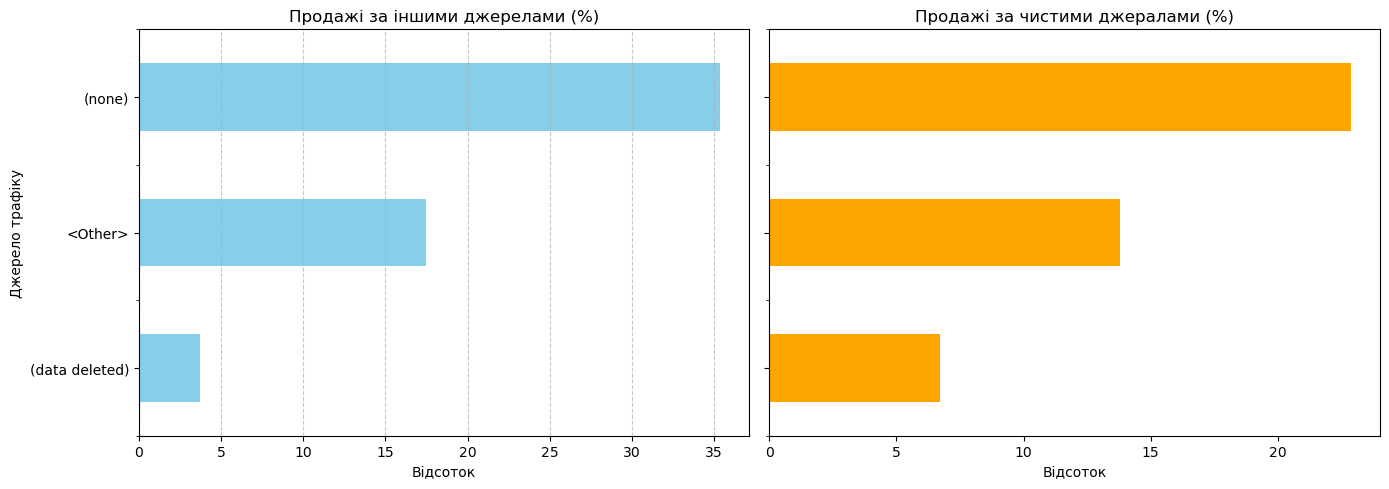

In [109]:
# Продажі за джерелами трафіку (у % від загальних продажів)
# Підрахунок загальних продажів по джерелах трафіку
traffic_source_sales = store_sales.groupby('traffic_source')['ga_session_id'].count()

# Обчислення у %
total_sales = traffic_source_sales.sum()
traffic_source_sales_percentage = (traffic_source_sales / total_sales) * 100

# Окремо виділяємо "чисті" та "інші"
excluded_sources = ['(data deleted)', '(none)', '<Other>']
clean_sources = traffic_source_sales_percentage.drop(excluded_sources, errors='ignore')
other_sources = traffic_source_sales_percentage.loc[traffic_source_sales_percentage.index.isin(excluded_sources)]


print("\n Чисті джерела трафіку (%):")
print(clean_sources.sort_values(ascending=False))

print("\n Інші джерела трафіку (%):")
print(other_sources.sort_values(ascending=False))


fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# 🔵 Чисті джерела
clean_sources.sort_values().plot(kind='barh', color='skyblue', ax=axes[0])
axes[0].set_title("Продажі за іншими джерелами (%)")
axes[0].set_xlabel("Відсоток")
axes[0].set_ylabel("Джерело трафіку")
axes[0].grid(axis='x', linestyle='--', alpha=0.7)

# 🟠 Інші джерела
other_sources.sort_values().plot(kind='barh', color='orange', ax=axes[1])
axes[1].set_title("Продажі за чистими джералами (%)")
axes[1].set_xlabel("Відсоток")
axes[1].set_ylabel("")  


plt.tight_layout()
plt.show()

In [110]:
#Відсоток зареєстрованих користувачів, які підтвердили свою електронну адресу

total_registered_users = store_sales['account_id'].nunique()
# Кількість користувачів, які підтвердили свою електронну адресу
verified_users = store_sales[store_sales['is_verified'] == True]['account_id'].nunique()
# Відсоток користувачів, які підтвердили свою електронну адресу
verified_users_percentage = (verified_users / total_registered_users) * 100
print(f"\nВідсоток зареєстрованих користувачів, які підтвердили свою електронну адресу: {verified_users_percentage:.2f}%")



Відсоток зареєстрованих користувачів, які підтвердили свою електронну адресу: 71.52%


In [111]:
#Відсоток зареєстрованих користувачів, які відписалися від розсилки

total_registered_users = store_sales['account_id'].nunique()
# Кількість користувачів, які відписалися від розсилки
unsubscribed_users = store_sales[store_sales['is_unsubscribed'] == True]['account_id'].nunique()
# Відсоток користувачів, які відписалися
unsubscribed_users_percentage = (unsubscribed_users / total_registered_users) * 100
print(f"\nВідсоток зареєстрованих користувачів, які відписалися від розсилки: {unsubscribed_users_percentage:.2f}%")



Відсоток зареєстрованих користувачів, які відписалися від розсилки: 16.07%


In [112]:
#Порівняння поведінки користувачів, які відписалися від розсилки та тих, хто підписаний
subscribed_users = store_sales[store_sales['is_unsubscribed'] == False]
unsubscribed_users_data = store_sales[store_sales['is_unsubscribed'] == True]
# Порівнюємо загальну кількість замовлень для кожної групи
subscribed_orders = subscribed_users['ga_session_id'].nunique()
unsubscribed_orders = unsubscribed_users_data['ga_session_id'].nunique()
print(f"\nКількість замовлень для підписаних користувачів: {subscribed_orders}")
print(f"Кількість замовлень для відписаних користувачів: {unsubscribed_orders}")
# Порівнюємо загальну суму продажів для кожної групи
subscribed_sales = subscribed_users['price'].sum()
unsubscribed_sales = unsubscribed_users_data['price'].sum()
print(f"\nЗагальна сума продажів для підписаних користувачів: {subscribed_sales}")
print(f"Загальна сума продажів для відписаних користувачів: {unsubscribed_sales}")



Кількість замовлень для підписаних користувачів: 2334
Кількість замовлень для відписаних користувачів: 447

Загальна сума продажів для підписаних користувачів: 2150796.9000000004
Загальна сума продажів для відписаних користувачів: 431721.6


In [113]:
# Середній чек для підписаних та відписаних користувачів
avg_check_subscribed = subscribed_users['price'].mean()
avg_check_unsubscribed = unsubscribed_users_data['price'].mean()

print(f"\nСередній чек для підписаних користувачів: {avg_check_subscribed:.2f}")
print(f"Середній чек для відписаних користувачів: {avg_check_unsubscribed:.2f}")


Середній чек для підписаних користувачів: 921.51
Середній чек для відписаних користувачів: 965.82


In [114]:
#Країни з найбільшою кількістю зареєстрованих користувачів
registered_users_by_country = store_sales.groupby('country')['account_id'].nunique()
top_countries_by_registered_users = registered_users_by_country.nlargest(5)
print("\nКраїни з найбільшою кількістю зареєстрованих користувачів:")
print(top_countries_by_registered_users)


Країни з найбільшою кількістю зареєстрованих користувачів:
country
United States     1207
India              246
Canada             207
United Kingdom      88
France              56
Name: account_id, dtype: int64


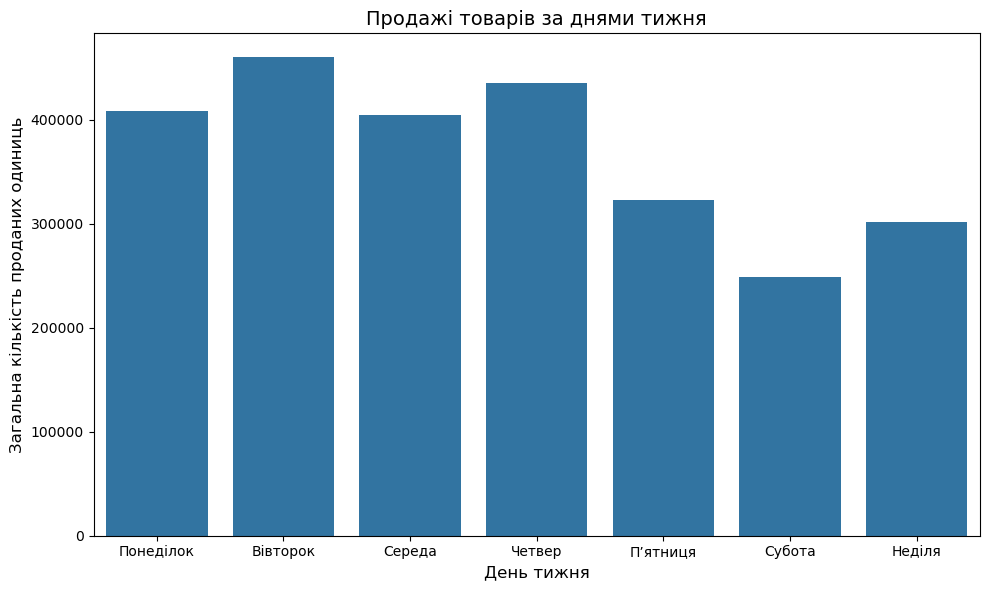

In [115]:
store_sales['Day of Week'] = store_sales['order_date'].dt.weekday

# Групування по дням тижня
sales_by_day_of_week = store_sales.groupby('Day of Week')['price'].sum().reset_index()

# Візуалізація
plt.figure(figsize=(10, 6))
sns.barplot(x='Day of Week', y='price', data=sales_by_day_of_week)
plt.title("Продажі товарів за днями тижня", fontsize=14)
plt.xlabel("День тижня", fontsize=12)
plt.ylabel("Загальна кількість проданих одиниць", fontsize=12)
plt.xticks(ticks=range(7), labels=["Понеділок", "Вівторок", "Середа", "Четвер", "П’ятниця", "Субота", "Неділя"])
plt.tight_layout()
plt.show()


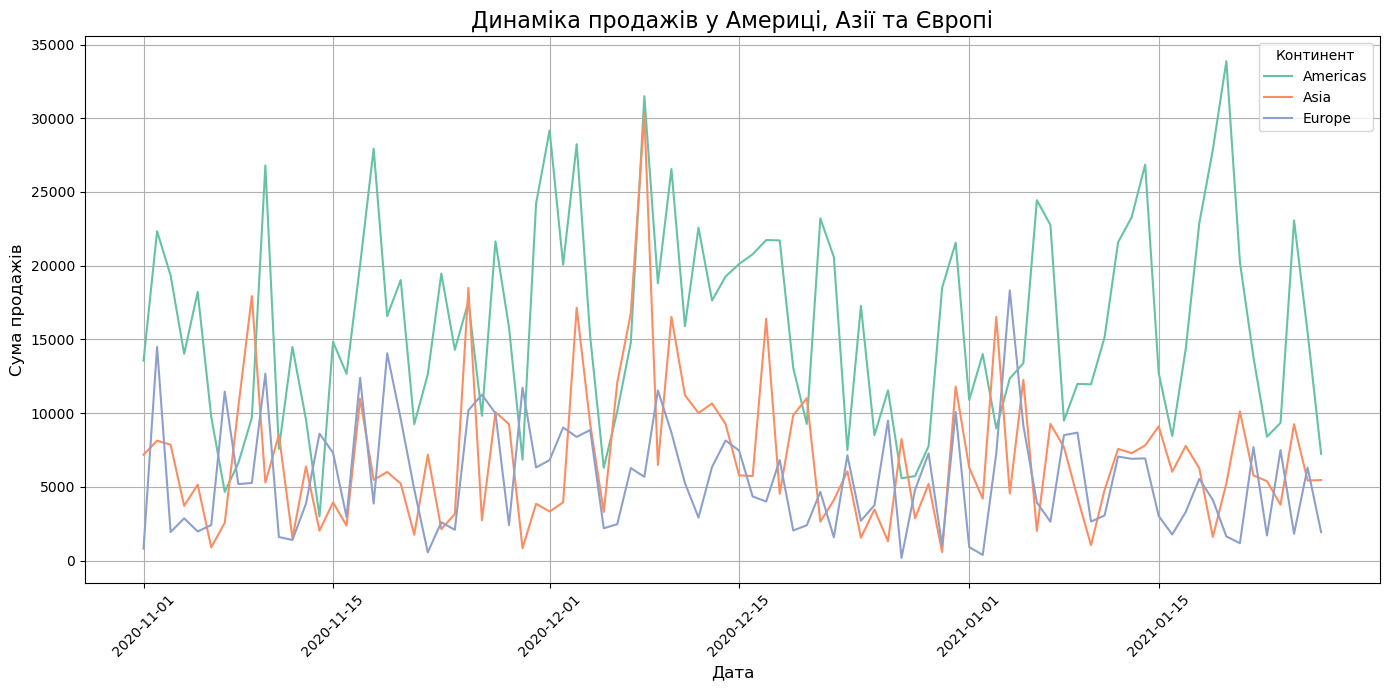

In [116]:
#проаналізуй динаміку продажів в Америці, Азії та Європі, відображай різні континенти різними кольорами
# Фільтруємо тільки потрібні континенти
continents_of_interest = ['Americas', 'Asia', 'Europe']
filtered_sales = store_sales[store_sales['continent'].isin(continents_of_interest)]

# Групуємо за датою і континентом, сумуємо продажі
sales_trend = (
    filtered_sales
    .groupby(['order_date', 'continent'])['price']
    .sum()
    .reset_index()
)

# Побудова графіка
plt.figure(figsize=(14, 7))
sns.lineplot(data=sales_trend, x='order_date', y='price', hue='continent', palette='Set2')

plt.title("Динаміка продажів у Америці, Азії та Європі", fontsize=16)
plt.xlabel("Дата", fontsize=12)
plt.ylabel("Сума продажів", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Континент')
plt.grid(True)
plt.tight_layout()
plt.show()


In [117]:
print(store_sales['continent'].unique())

['(not set)' 'Asia' 'Africa' 'Europe' 'Oceania' 'Americas']


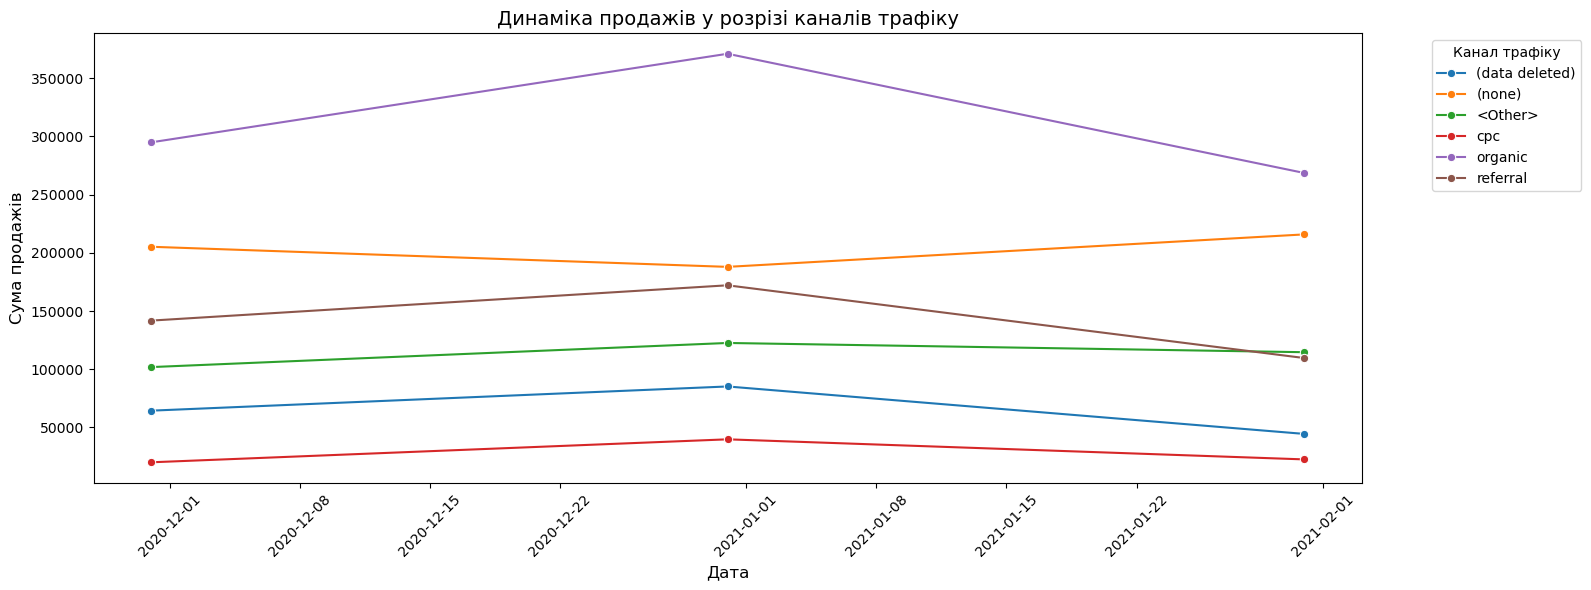

In [118]:
#проаналізуй динаміку продажів у розрізі каналів трафіку, відображай різні канали різними кольорами
store_sales['order_date'] = pd.to_datetime(store_sales['order_date'])
store_sales['Month'] = store_sales['order_date'].dt.to_period('M').astype(str)


traffic_source_sales = len(store_sales['traffic_source'].unique())
palette = sns.color_palette("tab20c", traffic_source_sales)

sales_by_channel = store_sales.groupby([
    pd.Grouper(key='order_date', freq='ME'),
    'traffic_source'
])['price'].sum().reset_index()

# Візуалізація
plt.figure(figsize=(16, 6))
sns.lineplot(data=sales_by_channel, x='order_date', y='price', hue='traffic_source', marker='o', palette='tab10')

plt.title("Динаміка продажів у розрізі каналів трафіку", fontsize=14)
plt.xlabel("Дата", fontsize=12)
plt.ylabel("Сума продажів", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Канал трафіку', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


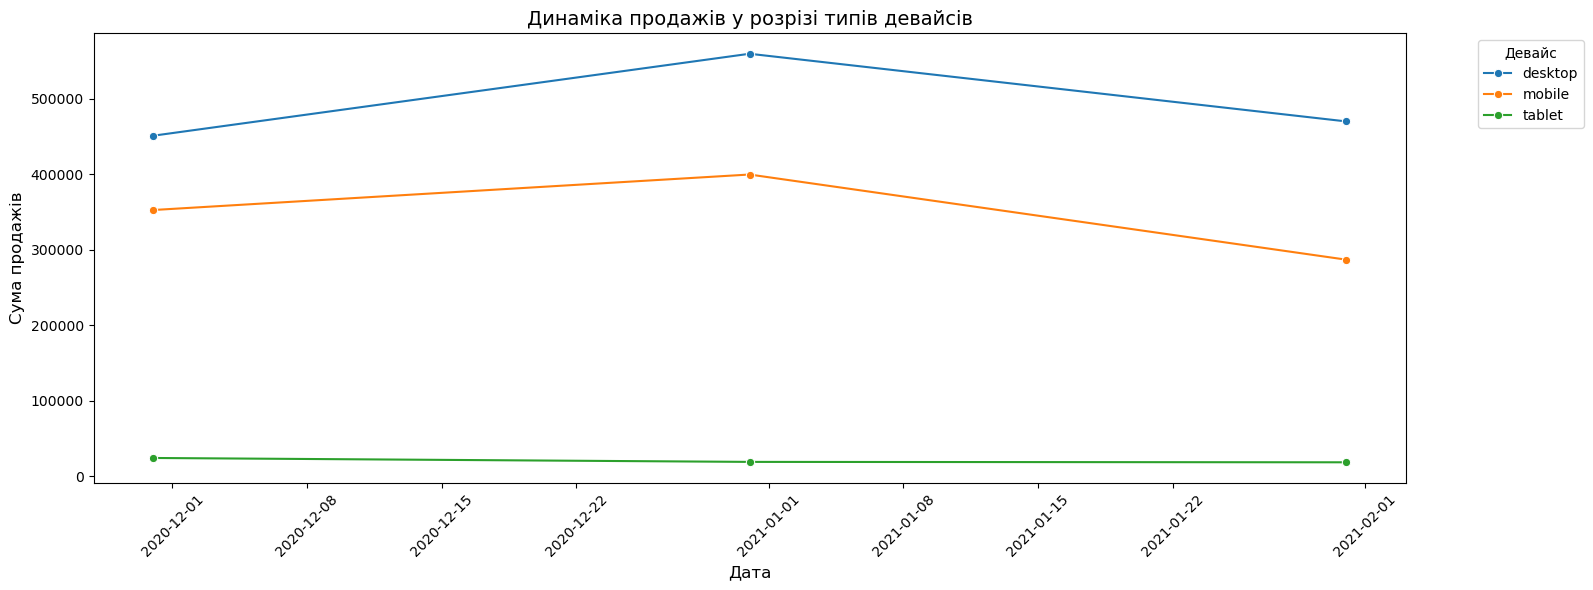

In [119]:
#проаналізуй динаміку продажів у розрізі типів девайсів, відображай різні девайси різними кольорами
store_sales['order_date'] = pd.to_datetime(store_sales['order_date'])
store_sales['Month'] = store_sales['order_date'].dt.to_period('M').astype(str)


traffic_source_sales = len(store_sales['device'].unique())
palette = sns.color_palette("tab20c", traffic_source_sales)

sales_by_channel = store_sales.groupby([
    pd.Grouper(key='order_date', freq='ME'),
    'device'
])['price'].sum().reset_index()

# Візуалізація
plt.figure(figsize=(16, 6))
sns.lineplot(data=sales_by_channel, x='order_date', y='price', hue='device', marker='o', palette='tab10')

plt.title("Динаміка продажів у розрізі типів девайсів", fontsize=14)
plt.xlabel("Дата", fontsize=12)
plt.ylabel("Сума продажів", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Девайс', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [120]:
#  зведену таблицю, яка показує кількість сесій у розрізі каналів трафіку та типів девайсів
clean_traffic_sources = ['organic', 'referral', 'cpc']
filtered_sales = store_sales[
    (store_sales['traffic_source'].isin(clean_traffic_sources)) &
    (store_sales['device'].notna()) &
    (store_sales['ga_session_id'].notna())
]
pivot_table = filtered_sales.pivot_table(
    index='traffic_source',
    columns='device',
    values='ga_session_id',
    aggfunc='count',
    fill_value=0
)

print("Зведена таблиця: кількість сесій у розрізі каналів трафіку та типів девайсів")
print(pivot_table)


Зведена таблиця: кількість сесій у розрізі каналів трафіку та типів девайсів
device          desktop  mobile  tablet
traffic_source                         
cpc                  68      33       3
organic             564     402      18
referral            269     206      11


In [121]:
# зведену таблицю, яка показує загальні продажі за категоріями товарів (топ-10 категорій) у різних країнах (топ-5 країн)
top_5_countries = store_sales.groupby('country')['price'].sum().nlargest(5).index
top_10_categories = store_sales.groupby('product_category')['price'].sum().nlargest(10).index

filtered_sales = store_sales[
    (store_sales['country'].isin(top_5_countries)) &
    (store_sales['product_category'].isin(top_10_categories))
]
pivot_table = filtered_sales.pivot_table(
    index='product_category',
    columns='country',
    values='price',
    aggfunc='sum',
    fill_value=0
)
print("Зведена таблиця: Загальні продажі (сума) по топ-10 категоріях у топ-5 країнах")
print(pivot_table)


Зведена таблиця: Загальні продажі (сума) по топ-10 категоріях у топ-5 країнах
country                            Canada    India  Singapore  United Kingdom  \
product_category                                                                
Bar furniture                      3763.0    503.0      129.0          2561.0   
Beds                              40796.0  20160.0     6939.0         11850.0   
Bookcases & shelving units        17364.0  29394.4     5078.0          6311.0   
Cabinets & cupboards              22746.0  17447.0     8750.0          7574.5   
Chairs                            22841.4  49072.2    10810.0         16528.0   
Chests of drawers & drawer units   3640.0   7922.0        0.0           881.0   
Children's furniture               3362.0   4601.0      304.0          1135.0   
Outdoor furniture                  1795.0  16364.4     3016.8          1982.0   
Sofas & armchairs                 55946.0  49474.5    28049.0         10578.0   
Tables & desks                 

In [122]:
#  таблиця сум продажів за категорією продуктів
store_sales_table = store_sales.pivot_table(values="price", index="product_category", aggfunc="sum")
print(store_sales_table)


                                         price
product_category                              
Bar furniture                          51014.0
Beds                                  394705.0
Bookcases & shelving units            275509.6
Cabinets & cupboards                  215869.5
Café furniture                         13381.0
Chairs                                539956.2
Chests of drawers & drawer units       57988.0
Children's furniture                   50235.0
Nursery furniture                       7679.0
Outdoor furniture                     143694.2
Room dividers                           8293.0
Sideboards, buffets & console tables   10205.0
Sofas & armchairs                     660456.0
Tables & desks                        153533.0


In [123]:
#сума/середне значення продуктів по контінетам 
cleaned_sales = store_sales[
    (store_sales['product_category'].notna()) &
    (store_sales['continent'].notna()) &
    (store_sales['continent'] != '(not set)') &
    (store_sales['product_category'] != '(not set)')
]

# Створення зведеної таблиці
store_sales_table = cleaned_sales.pivot_table(
    values="price",
    index="product_category",
    columns="continent",
    aggfunc=["sum", "mean"]
)

print(store_sales_table)

                                          sum                                \
continent                              Africa  Americas      Asia    Europe   
product_category                                                              
Bar furniture                           395.0   31196.0    9619.0    9804.0   
Beds                                    214.0  230828.5   97465.5   64282.0   
Bookcases & shelving units             6776.6  133123.4   78685.4   54677.2   
Cabinets & cupboards                   4540.0  122662.0   47215.0   39559.5   
Café furniture                            NaN    7296.0    3349.0    1941.0   
Chairs                                  800.0  268501.8  142022.4  119066.0   
Chests of drawers & drawer units        521.5   27810.5   16880.0   12060.0   
Children's furniture                    144.0   30044.0   11258.0    8774.0   
Nursery furniture                         NaN    3830.0    2089.0    1560.0   
Outdoor furniture                       974.0   6789

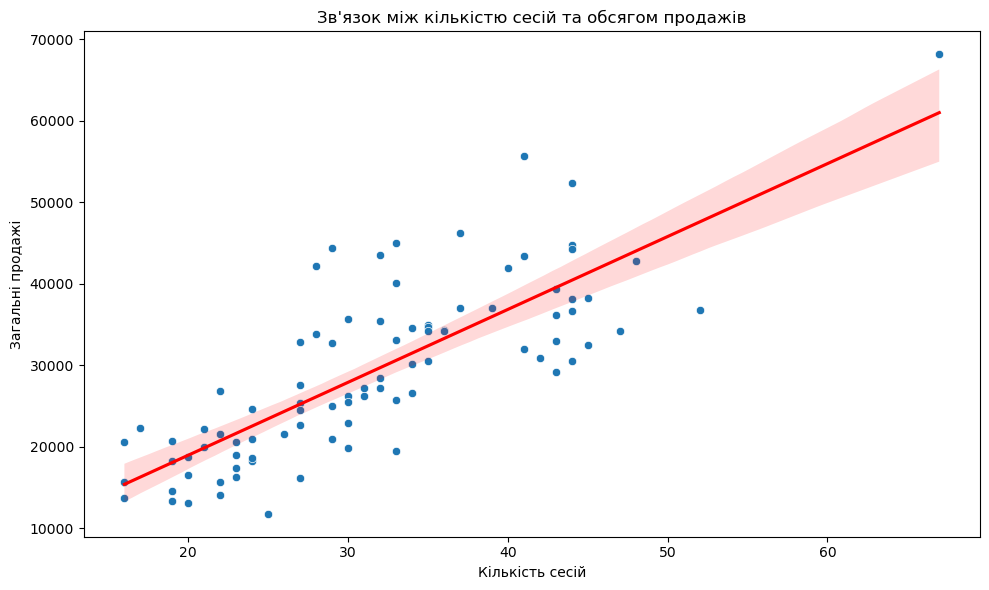

Коефіцієнт кореляції: 0.798
P-value: 0.00000


In [125]:
# кількість сесій та загальні продажі за кожну дату
from scipy.stats import pearsonr
store_sales['order_date'] = pd.to_datetime(store_sales['order_date'])

# Групуємо по датах: кількість сесій та суму продажів
daily_metrics = store_sales.groupby('order_date').agg({
    'ga_session_id': 'nunique',   # унікальні сесії
    'price': 'sum'                # загальні продажі
}).rename(columns={'ga_session_id': 'sessions', 'price': 'sales'}).reset_index()


plt.figure(figsize=(10, 6))
sns.scatterplot(data=daily_metrics, x='sessions', y='sales')
sns.regplot(data=daily_metrics, x='sessions', y='sales', scatter=False, color='red')  # лінія регресії
plt.title("Зв'язок між кількістю сесій та обсягом продажів")
plt.xlabel("Кількість сесій")
plt.ylabel("Загальні продажі")
plt.tight_layout()
plt.show()


corr_coef, p_value = pearsonr(daily_metrics['sessions'], daily_metrics['sales'])

print(f"Коефіцієнт кореляції: {corr_coef:.3f}")
print(f"P-value: {p_value:.5f}")


 Кореляційна матриця між континентами:
continent  Americas      Asia    Europe
continent                              
Americas   1.000000  0.239203  0.087990
Asia       0.239203  1.000000  0.091868
Europe     0.087990  0.091868  1.000000


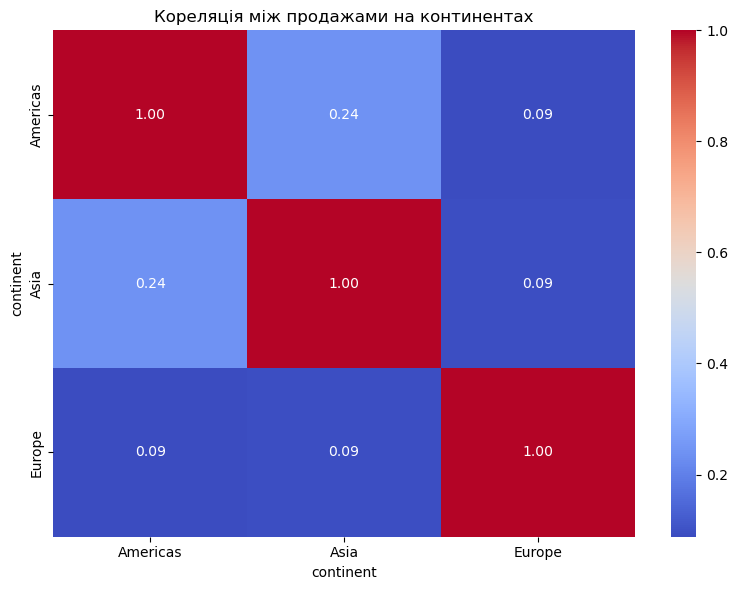


P-value для пар континентів:
Americas - Asia: corr = 0.239, p-value = 0.02480
Americas - Europe: corr = 0.088, p-value = 0.41496
Asia - Europe: corr = 0.092, p-value = 0.39462


In [127]:
top_3_continent = store_sales.groupby('continent')['price'].sum().nlargest(3).index
filtered_sales = store_sales[store_sales['continent'].isin(top_3_continent)]
sales_by_continent = filtered_sales.groupby(['order_date', 'continent'])['price'].sum().reset_index()

sales_pivot = sales_by_continent.pivot(index='order_date', columns='continent', values='price')

sales_pivot = sales_pivot.dropna()


corr_matrix = sales_pivot.corr()
print("\n Кореляційна матриця між континентами:")
print(corr_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Кореляція між продажами на континентах")
plt.tight_layout()
plt.show()


print("\nP-value для пар континентів:")

columns = sales_pivot.columns

# Перебираємо унікальні пари континентів
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        cont1 = columns[i]
        cont2 = columns[j]
        corr, p = pearsonr(sales_pivot[cont1], sales_pivot[cont2])
        print(f"{cont1} - {cont2}: corr = {corr:.3f}, p-value = {p:.5f}")




     traffic_source order_date   price
0    (data deleted) 2020-11-02  6558.0
1    (data deleted) 2020-11-03  2140.0
2    (data deleted) 2020-11-04   609.0
3    (data deleted) 2020-11-05  1126.0
4    (data deleted) 2020-11-06   795.0
..              ...        ...     ...
471        referral 2021-01-23  4455.0
472        referral 2021-01-24  3806.0
473        referral 2021-01-25  1655.0
474        referral 2021-01-26    85.0
475        referral 2021-01-27  3836.0

[476 rows x 3 columns]


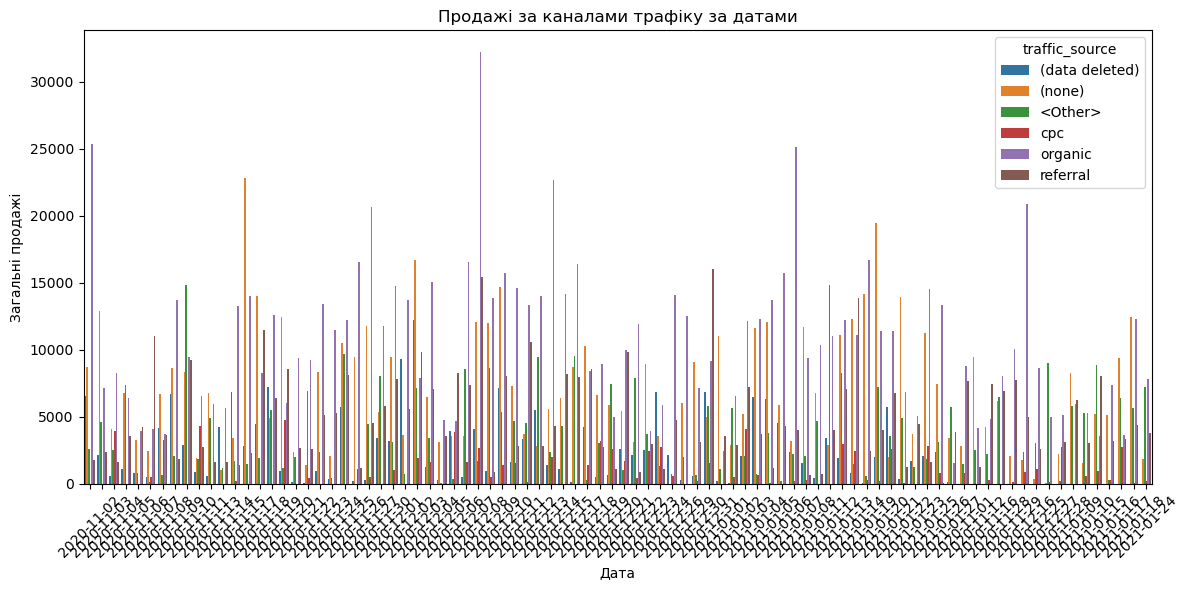

Кореляція Спірмена: 0.006
P-value: 0.77068


In [129]:
from scipy.stats import spearmanr
sales_by_traffic = store_sales.groupby(['traffic_source', 'order_date']).agg({'price': 'sum'}).reset_index()
print(sales_by_traffic)

plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_traffic, x='order_date', y='price', hue='traffic_source')
plt.title("Продажі за каналами трафіку за датами")
plt.xlabel("Дата")
plt.ylabel("Загальні продажі")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

store_sales['traffic_source_num'] = store_sales['traffic_source'].astype('category').cat.codes
corr_coef, p_value = spearmanr(store_sales['traffic_source_num'], store_sales['price'])
print(f"Кореляція Спірмена: {corr_coef:.3f}")
print(f"P-value: {p_value:.5f}")

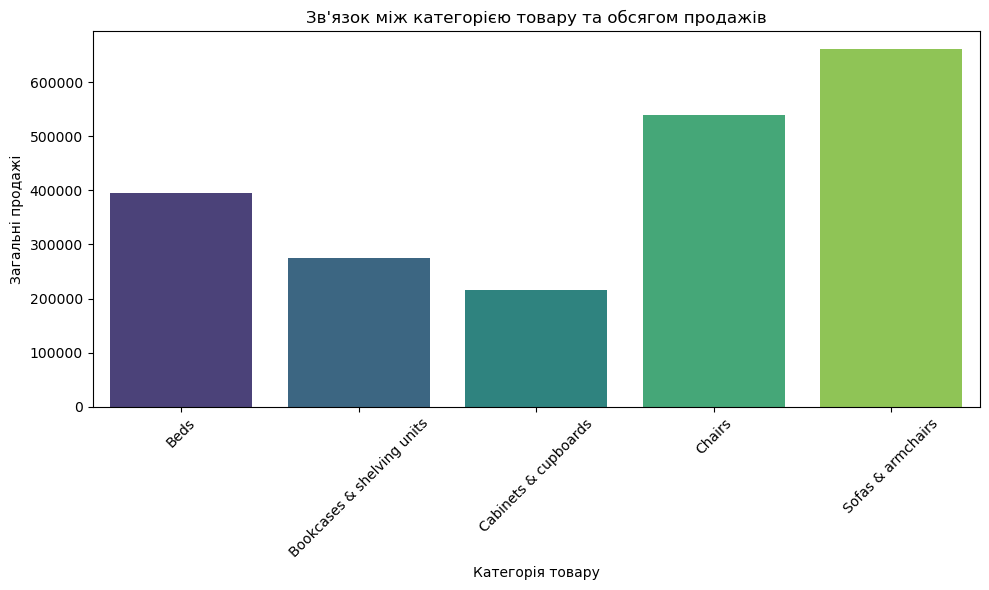

Коефіцієнт кореляції: 0.684
P-value: 0.20270


In [137]:
# Вибираємо топ-5 категорій товарів за обсягом продажів
top_5_product = store_sales.groupby('product_category')['price'].sum().nlargest(5).index
filtered_sales = store_sales[store_sales['product_category'].isin(top_5_product)]

# Групуємо дані за категорією товару та обчислюємо суму продажів
category_sales = filtered_sales.groupby('product_category')['price'].sum().reset_index()

# Переводимо категорії товарів в числові значення для аналізу
category_sales['category_numeric'] = category_sales['product_category'].astype('category').cat.codes

# Візуалізація даних
plt.figure(figsize=(10, 6))
sns.barplot(x='product_category', y='price', data=category_sales, palette='viridis',hue='product_category')

plt.title("Зв'язок між категорією товару та обсягом продажів")
plt.xlabel("Категорія товару")
plt.ylabel("Загальні продажі")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Обчислюємо кореляцію Пірсона між числовими категоріями та продажами
from scipy.stats import pearsonr
corr_coef, p_value = pearsonr(category_sales['category_numeric'], category_sales['price'])

print(f"Коефіцієнт кореляції: {corr_coef:.3f}")
print(f"P-value: {p_value:.5f}")



In [135]:
print(store_sales.columns)

Index(['order_date', 'ga_session_id', 'continent', 'country', 'device',
       'browser', 'device_model', 'operating_system', 'browser_language',
       'traffic_source', 'channel', 'account_id', 'is_verified',
       'is_unsubscribed', 'product_category', 'product_name', 'price',
       'short_description', 'duplicate_rows', 'Day of Week', 'Month',
       'traffic_source_num'],
      dtype='object')


  order_date    price
0 2020-11-01  10517.0
1 2020-11-02  35662.0
2 2020-11-03  24177.5
3 2020-11-04  11814.6
4 2020-11-05  22278.6
  order_date    price
0 2020-11-01  11030.0
1 2020-11-02   9294.8
2 2020-11-03   4973.0
3 2020-11-04   9167.6
4 2020-11-05   3056.0


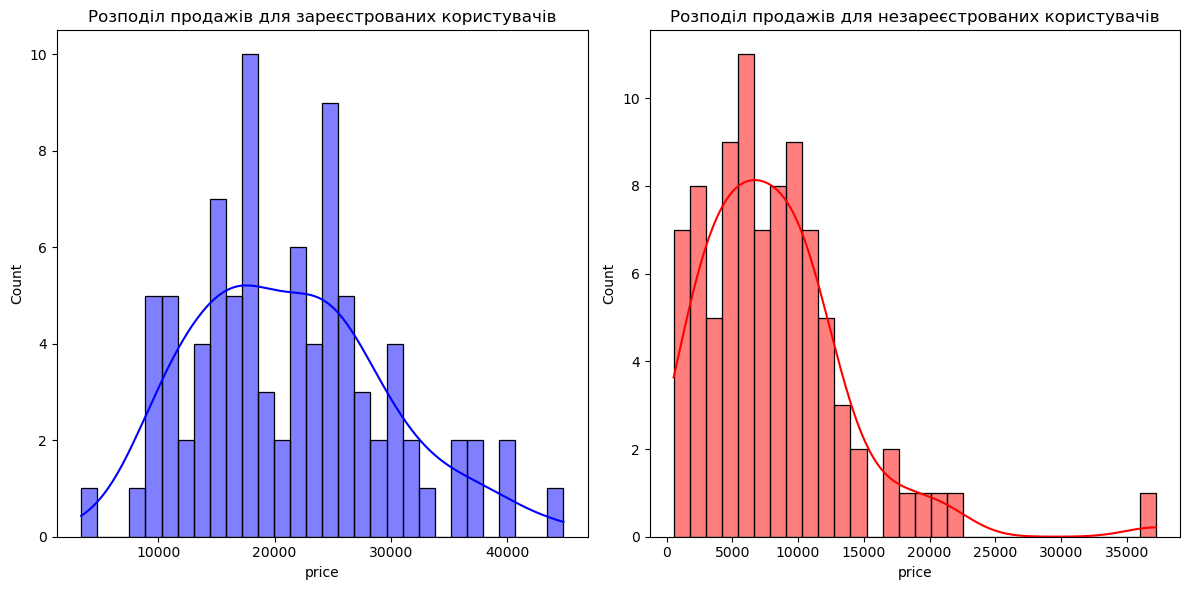

Статистика тесту Манна-Уїтні: 7147.000
P-value: 0.00000


In [138]:
#Створення вибірок для зареєстрованих та незареєстрованих користувачів
# Створення вибірок для зареєстрованих та незареєстрованих користувачів
registered_sales = store_sales[store_sales['is_verified'] == True]
unregistered_sales = store_sales[store_sales['is_verified'] == False]

# Групування даних по датах та підрахунок загальних продажів
registered_sales_daily = registered_sales.groupby('order_date')['price'].sum().reset_index()
unregistered_sales_daily = unregistered_sales.groupby('order_date')['price'].sum().reset_index()

# Перегляд перших кількох рядків для обох вибірок
print(registered_sales_daily.head())
print(unregistered_sales_daily.head())



# Візуалізація розподілів
plt.figure(figsize=(12, 6))

# Гістограма для зареєстрованих
plt.subplot(1, 2, 1)
sns.histplot(registered_sales_daily['price'], kde=True, color='blue', bins=30)
plt.title("Розподіл продажів для зареєстрованих користувачів")

# Гістограма для незареєстрованих
plt.subplot(1, 2, 2)
sns.histplot(unregistered_sales_daily['price'], kde=True, color='red', bins=30)
plt.title("Розподіл продажів для незареєстрованих користувачів")

plt.tight_layout()
plt.show()


from scipy.stats import mannwhitneyu

# Тест Манна-Уїтні
stat, p_value = mannwhitneyu(registered_sales_daily['price'], unregistered_sales_daily['price'])
print(f"Статистика тесту Манна-Уїтні: {stat:.3f}")
print(f"P-value: {p_value:.5f}")

In [140]:
# Аналіз кількості сесій за різними каналами трафіку

sessions_by_traffic_source = store_sales.groupby('traffic_source')['ga_session_id'].nunique().reset_index()
print(sessions_by_traffic_source)

from scipy.stats import  kruskal
traffic_groups = [store_sales[store_sales['traffic_source'] == traffic]['ga_session_id'] for traffic in sessions_by_traffic_source['traffic_source']]
stat, p_value = kruskal(*traffic_groups)
print(f"Статистика тесту Краскала-Уолліса: {stat:.3f}")
print(f"P-value: {p_value:.5f}")

   traffic_source  ga_session_id
0  (data deleted)            187
1          (none)            636
2         <Other>            384
3             cpc            104
4         organic            984
5        referral            486
Статистика тесту Краскала-Уолліса: 0.875
P-value: 0.97201


In [142]:
# Фільтрація сесій з органічним трафіком для Європи та Америки
organic_sessions_europe = store_sales[(store_sales['traffic_source'] == 'organic') & (store_sales['continent'] == 'Europe')]['ga_session_id'].nunique()
organic_sessions_americas = store_sales[(store_sales['traffic_source'] == 'organic') & (store_sales['continent'] == 'Americas')]['ga_session_id'].nunique()

# Загальна кількість сесій у кожному континенті
total_sessions_europe = store_sales[store_sales['continent'] == 'Europe']['ga_session_id'].nunique()
total_sessions_americas = store_sales[store_sales['continent'] == 'Americas']['ga_session_id'].nunique()

# Розрахунок долі органічних сесій
organic_share_europe = organic_sessions_europe / total_sessions_europe
organic_share_americas = organic_sessions_americas / total_sessions_americas

print(f"Доля органічних сесій у Європі: {organic_share_europe:.3f}")
print(f"Доля органічних сесій в Америці: {organic_share_americas:.3f}")

from statsmodels.stats.proportion import proportions_ztest

# Створення масивів для тесту
count = [organic_sessions_europe, organic_sessions_americas]
nobs = [total_sessions_europe, total_sessions_americas]

# Проведення z-тесту
stat, p_value = proportions_ztest(count, nobs)
print(f"Статистика тесту: {stat:.3f}")
print(f"P-value: {p_value:.5f}")


Доля органічних сесій у Європі: 0.331
Доля органічних сесій в Америці: 0.354
Статистика тесту: -0.954
P-value: 0.34031
